题目：寻找关键用户和分析社交关系
data.json 数据描述
1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...
问题：

1. 社交网络构建与分析
a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [35]:
import json

with open('hw4_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

users = data['nodes']
relas = data['edges']

# a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
social_network = {}
for edge in relas:
    user1, user2, rela = edge
    social_network.setdefault(user1, {})[user2] = rela
    social_network.setdefault(user2, {})[user1] = rela

# b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。 
dir_friends = {}
for user in social_network:
    dir_friends[user] = list(social_network[user].keys())

for user, friends in dir_friends.items():
    print(f"{user} 的直接朋友: {friends}")


Yanyan-Wang 的直接朋友: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca 的直接朋友: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu 的直接朋友: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
andyhuang18 的直接朋友: ['tyn1998', 'wj23027', 'will-ww', 'zhicheng-ning', 'lhbvvvvv', 'frank-zsy', 'bifenglin', 'wxharry', 'Zzzzzhuzhiwei', 'stevending1st', 'PureNatural', 'pranavshuklaa', 'pomelo-nwu', 'stealth-bombeer', 'Vlad116', 'kunal8411', 'xgdyp', 'longyanz', 'xiaoya-yaya', 'zhaosj975', 'birdf

2. 统计与度中心性分析
a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

In [36]:
# a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
degrees = {user: len(friends) for user, friends in dir_friends.items()}
degrees_sort=sorted(degrees.items(),key=lambda x: x[1], reverse=True)
print("度数最多的前5个用户及其朋友数量:")
for i in range(5):
    print(f"{degrees_sort[i][0]}: {degrees_sort[i][1]}")

度数最多的前5个用户及其朋友数量:
tyn1998: 30
frank-zsy: 30
pomelo-nwu: 24
andyhuang18: 23
wj23027: 23


In [37]:
# b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
influscores = {user[0]: user[1] for user in users}
influscores_sort=sorted(influscores.items(),key=lambda x: x[1], reverse=True)
print("影响力最高的前5个用户:")
for i in range(5):
    print(f"{influscores_sort[i][0]}")

影响力最高的前5个用户:
Yanyan-Wang
Aarebecca
pomelo-nwu
tyn1998
frank-zsy


In [38]:
# c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。
# 各占50%
avescores = {}
for user in influscores:
    avescores[user] = (degrees[user] * 0.5 + influscores[user] * 0.5)
avescores_sort=sorted(avescores.items(),key=lambda x: x[1], reverse=True)
print("综合影响力最高的前5个用户:")
for i in range(5):
    print(f"{avescores_sort[i][0]}")

综合影响力最高的前5个用户:
Yanyan-Wang
tyn1998
pomelo-nwu
frank-zsy
Aarebecca


3. 推荐新朋友
a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。

In [39]:
# a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
# 朋友
yan_friends1 = dir_friends.get('Yanyan-Wang', [])
com_friends = {}
for friend1 in yan_friends1:
    # 朋友的朋友
    yan_friends2 = dir_friends.get(friend1, [])
    for friend2 in yan_friends2:
        if friend2!= 'Yanyan-Wang': 
            # 统计共同朋友数量
            com_friends_count = len(set(yan_friends1).intersection(set(dir_friends.get(friend2, []))))
            if friend2 not in com_friends:
                com_friends[friend2] = com_friends_count

maxcount = max(com_friends.values())
reco_users = [user for user, count in com_friends.items() if count == maxcount]

print(f"对于用户Yanyan-Wang，推荐的新朋友及理由如下：")
for user in reco_users:
    print(f"推荐用户：{user}，理由：有{maxcount}个共同朋友")

对于用户Yanyan-Wang，推荐的新朋友及理由如下：
推荐用户：pomelo-nwu，理由：有13个共同朋友
推荐用户：yangzy0603，理由：有13个共同朋友
推荐用户：tyn1998，理由：有13个共同朋友
推荐用户：frank-zsy，理由：有13个共同朋友


In [40]:
# b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
import heapq
# 贪心算法 优先队列
def dijkstra(graph, start_user):
    shortest_paths = {start_user: 0}
    queue = [[0, start_user]]
    while queue: # 队列为空 遍历完后结束
        current_weight, current_user = heapq.heappop(queue)
        if current_weight > shortest_paths.get(current_user, float('inf')):
            continue
        for neighbor, weight in graph[current_user].items():
            new_weight = current_weight + weight
            if new_weight < shortest_paths.get(neighbor, float('inf')):
                shortest_paths[neighbor] = new_weight
                heapq.heappush(queue, [new_weight, neighbor])
    return shortest_paths

start_user = 'Yanyan-Wang'
shortest_paths = dijkstra(social_network, start_user)

shortest_paths_sort = sorted(shortest_paths.items(), key=lambda x: x[1], reverse=True)

print(f"与 {start_user} 连接强度最高的 5 个用户：")
for user, path_weight in shortest_paths_sort[:5]:
    print(f"{user} - 连接强度: {path_weight:.2f}")


与 Yanyan-Wang 连接强度最高的 5 个用户：
tyn1998 - 连接强度: 5.24
will-ww - 连接强度: 4.05
PureNatural - 连接强度: 3.83
zhicheng-ning - 连接强度: 3.66
wxharry - 连接强度: 3.61


4. 网络图的可视化
a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

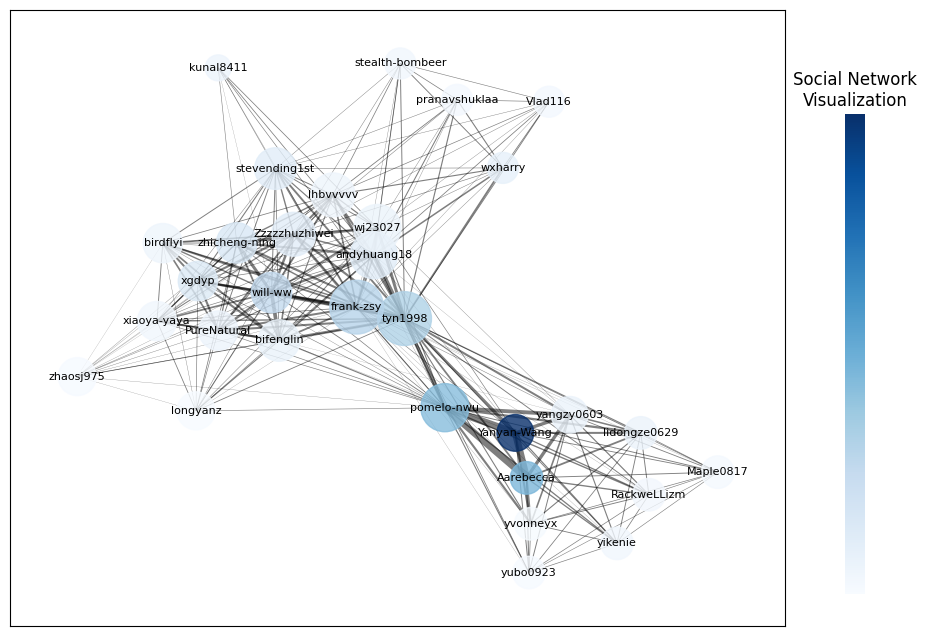

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# 添加节点（包括用户的影响力分数）
for user, influ in users:
    G.add_node(user, influ=influ)

# 添加边（包括连接强度）
for user1, user2, weight in relas:
    G.add_edge(user1, user2, weight=weight)

# 设置图的布局
pos = nx.spring_layout(G, seed=42)

# 节点的大小：根据节点的度数（即用户的连接数）
node_sizes = [len(list(G.neighbors(node))) * 50 for node in G.nodes()]

# 节点的颜色：根据影响力得分（影响力得分越高，颜色越深）
node_colors = [G.nodes[node]['influ'] for node in G.nodes()]

# 边的宽度：根据边的权重（连接强度）
edge_weights = [G[u][v]['weight']/5 for u, v in G.edges()]

# 绘制图形
plt.figure(figsize=(10, 8))

# 绘制节点和边
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color="black")
nx.draw_networkx_labels(G, pos, font_size=8)

# 创建一个用于放置颜色条的新坐标轴对象
cax = plt.gcf().add_axes([0.96, 0.15, 0.02, 0.6])  # 参数是[left, bottom, width, height]指定坐标轴位置和大小
# 添加颜色条（影响力得分）
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), cax=cax,label="Influence Score")

# 显示图形
plt.title("Social Network\nVisualization")
plt.axis('off')  # 不显示坐标轴
plt.show()


在社交网络中最具影响力的用户：
颜色深的节点表示影响力得分较高，大小大的节点表示连接更多的用户，这些节点是社交网络中具有较强影响力的用户。